In [78]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [79]:
# 현재경로 확인
os.getcwd()

'D:\\개인폴더\\온라인강의\\실습자료'

In [80]:
# 데이터 불러오기
corolla = pd.read_csv("./data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [81]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1436 nVar: 37


## 범주형 변수를 이진형 변수로 변환

In [82]:
# 가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [83]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [84]:

# 연료타입에 대한 위치 인덱스를 저장  
p_idx = np.array(corolla.Fuel_Type == "Petrol")
d_idx = np.array(corolla.Fuel_Type == "Diesel")
c_idx = np.array(corolla.Fuel_Type == "CNG")

In [85]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [86]:
# 인덱스 슬라이싱 후 (binary = 1) 대입
dummy_p[p_idx] = 1  # Petrol
dummy_d[d_idx] = 1  # Diesel
dummy_c[c_idx] = 1  # CNG

In [87]:
dummy_d

array([1, 1, 1, ..., 0, 0, 0])

## 불필요한 변수 제거 및 가변수 추가


In [88]:
# np or dict to DF
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})

# column slice
corolla_ = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)

In [89]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,0,1,0


In [90]:
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [91]:
# bias 추가
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


## 설명변수(X), 타켓변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [92]:
feature_columns = list(mlr_data.columns.difference(['Price']))
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [93]:
# Train the MLR / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [94]:
fitted_full_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     313.7
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:16:59   Log-Likelihood:                -8428.5
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     971   BIC:                         1.709e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -337.0620    129.189     -2.609      0.009    -590.584     -83.540
Age_08_04         -115.2938      4.156    -27.743      0.000    -123.449    -107.138
Airbag_1           205.8532    241.808      0.851      0.395    -268.674     680.380
Airbag_2           -51.6689    133.407     -0.387      0.699    -313.469     210.131
Airco              171.2654     91.847      1.865      0.063      -8.977     351.508
Automatic          422.5479    166.238      2.542      0.011      96.320     748.776
Automatic_airco   2352.9012    197.356     11.922      0.000    1965.607    2740.195
BOVAG_Guarantee    498.4969    136.637      3.648      0.000     230.360     766.634
Backseat_Divider  -350.7421    133.069     -2.636      0.009    -611.878     -89.606
Boardcomputer     -232.8604    122.034     -1.908      0.057    -472.341       6.620
CD_Player          309.7577    102.444      3.024      0.003     108.721     510.795
CNG              -1091.5485    243.180     -4.489      0.000   -1568.767    -614.330
Central_Lock        10.1196    155.012      0.065      0.948    -294.077     314.316
Cylinders           -0.0386      0.002    -16.047      0.000      -0.043      -0.034
Diesel            -288.0980    200.008     -1.440      0.150    -680.595     104.399
Doors               14.3584     42.249      0.340      0.734     -68.552      97.269
Gears              316.6776    215.404      1.470      0.142    -106.033     739.388
Guarantee_Period    60.6542     13.963      4.344      0.000      33.253      88.056
HP                  14.1103      3.880      3.636      0.000       6.495      21.725
KM                  -0.0158      0.001    -12.093      0.000      -0.018      -0.013
Met_Color           38.1244     78.534      0.485      0.627    -115.991     192.239
Metallic_Rim       105.0548     97.545      1.077      0.282     -86.368     296.478
Mfg_Month         -100.5814     10.860     -9.262      0.000    -121.892     -79.271
Mfg_Year            -1.3402      0.930     -1.440      0.150      -3.166       0.486
Mfr_Guarantee      260.3600     76.461      3.405      0.001     110.312     410.408
Mistlamps           -6.6087    112.847     -0.059      0.953    -228.061     214.844
Petrol            1379.6368    206.398      6.684      0.000     974.600    1784.674
Power_Steering      60.7610    280.618      0.217      0.829    -489.927     611.449
Powered_Windows    293.8541    155.148      1.894      0.059     -10.610     598.318
Quarterly_Tax       14.9298      1.828      8.168      0.000      11.343      18.517
Radio             1363.0107    784.744      1.737      0.083    -176.979    2903.001
Radio_cassette   -1530.7876    783.085     -1.955      0.051   -3067.521       5.946
Sport_Model        291.1557     92.090      3.162      0.002     110.437     471.874
Tow_Bar           -251.

## VIF를 통한 다중공선성 확인 

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


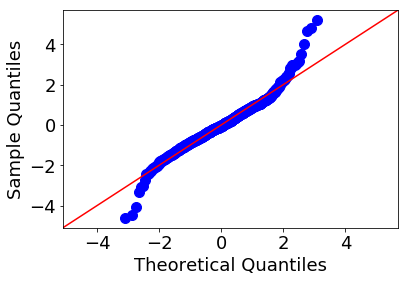

In [96]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid  # residual
pred_y=fitted_full_model.predict(train_x)
# q-q plot # 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

Text(0,0.5,'Residual')

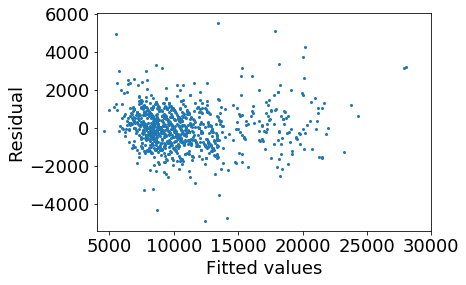

In [97]:
# residual pattern 확인
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y,res, s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [98]:
pred_y=fitted_full_model.predict(test_x) ## 검증 데이터에 대한 예측 

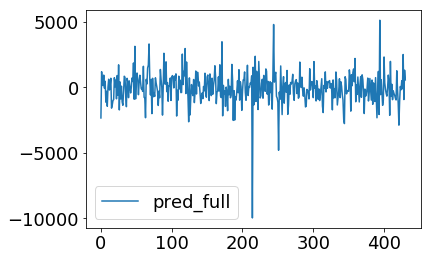

In [99]:
plt.plot(np.array(test_y-pred_y),label="pred_full")
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error

In [101]:
 mean_squared_error(y_true= test_y, y_pred= pred_y)

1441488.811437499

## 변수선택법

In [102]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002530FC4C588>, 'AIC': 19096.10217951304}


In [103]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)


{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x25367c8bef0>,
 'AIC': 16925.027694336146}

In [104]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

Processed  630 models on 2 predictors in 1.8201320171356201 seconds.
AIC                                                17516.6
model    <statsmodels.regression.linear_model.Regressio...
Name: 211, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]


In [105]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

In [106]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.09873557090759277 seconds.
Processed  630 models on 2 predictors in 1.3473966121673584 seconds.
Processed  7140 models on 3 predictors in 17.01948356628418 seconds.
Total elapsed time: 18.805707454681396 seconds.


In [107]:
models

,AIC,model
1,17780.793783,<statsmodels.regression.linear_model.Regressio...
2,17516.565117,<statsmodels.regression.linear_model.Regressio...
3,17342.727252,<statsmodels.regression.linear_model.Regressio...


In [108]:
models.loc[3, "model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2085.
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:47   Log-Likelihood:                -8667.4
No. Observations:                1005   AIC:                         1.734e+04
Df Residuals:                    1001   BIC:                         1.736e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0237      0.001    -17.385      0.000      -0.026      -0.021
Mfg_Year    1482.2017     38.251     38.749      0.000    1407.140    1557.263
Weight        19.2612      0.978     19.687      0.000      17.341      21.181
const      -2.972e+06    7.6e+04    -39.118      0.000   -3.12e+06   -2.82e+06
==============================================================================
Omnibus:                      173.868   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1809.869
Skew:                          -0.444   Prob(JB):                         0.00
Kurtosis:                       9.514   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

full model Rsquared:  0.91424
full model AIC:  16925.02769
full model MSE:  13156975.07120
selected model Rsquared:  0.86205
selected model AIC:  17342.72725
selected model MSE:  13156975.07120


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 'argmin' is deprecated, use 

Text(0,0.5,'BIC')

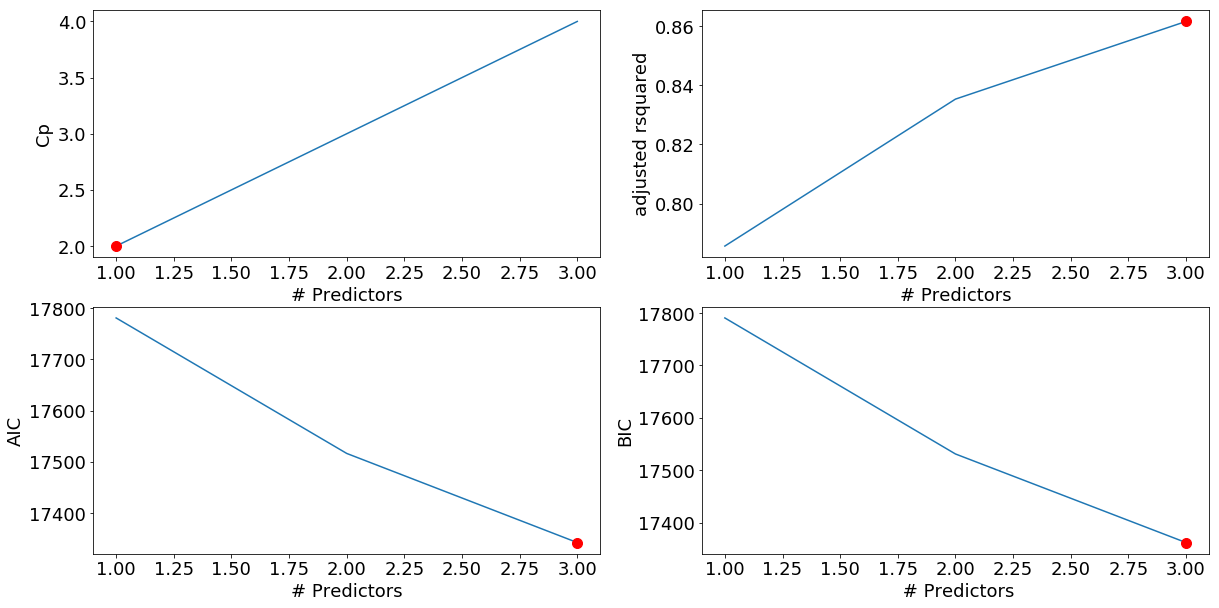

In [110]:
# Plot the result
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(2, 2, 1)
Cp= models.apply(lambda row: (row[1].params.shape[0]+(row[1].mse_total-
                               fitted_full_model.mse_total)*(train_x.shape[0]-
                                row[1].params.shape[0])/fitted_full_model.mse_total
                               ), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# adj-rsquared plot
# adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

# bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel(' # Predictors')
plt.ylabel('BIC')

# 전진선택법

In [111]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [112]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [113]:
Forward_best_model = forward_model(X=train_x, y= train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


Processed  36 models on 1 predictors in 0.09574389457702637
Selected predictors: ['Mfg_Year', 'const']  AIC: 17780.793782949546
Processed  35 models on 2 predictors in 0.0688169002532959
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17516.56511683886
Processed  34 models on 3 predictors in 0.07978653907775879
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: 17394.350298524347
Processed  33 models on 4 predictors in 0.08078455924987793
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: 17159.136571612646
Processed  32 models on 5 predictors in 0.09175467491149902
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'const']  AIC: 17101.081724864467
Processed  31 models on 6 predictors in 0.07479977607727051
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'const']  AIC: 17071.136319567708
Processed  30 models on 7 predictors in 0.092751502990

In [114]:
Forward_best_model.aic

16911.420764926872

In [115]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     451.5
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:49   Log-Likelihood:                -8431.7
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     981   BIC:                         1.703e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1370.5786     48.629     28.184      0.000    1275.149    1466.008
Automatic_airco   2335.8164    184.804     12.639      0.000    1973.159    2698.473
KM                  -0.0162      0.001    -12.640      0.000      -0.019      -0.014
Weight              14.2568      1.326     10.750      0.000      11.654      16.859
HP                  13.5006      3.756      3.595      0.000       6.131      20.871
Powered_Windows    337.9498     83.479      4.048      0.000     174.131     501.768
BOVAG_Guarantee    543.4616    132.187      4.111      0.000     284.059     802.864
Guarantee_Period    62.9447     13.709      4.592      0.000      36.043      89.847
Quarterly_Tax       14.6630      1.783      8.222      0.000      11.163      18.163
Petrol            1673.4926    303.018      5.523      0.000    1078.855    2268.130
Tow_Bar           -249.9424     79.086     -3.160      0.002    -405.140     -94.744
CD_Player          313.1649    100.290      3.123      0.002     116.357     509.973
Mfr_Guarantee      262.3638     75.060      3.495      0.000     115.066     409.661
Sport_Model        290.7843     87.520      3.322      0.001     119.036     462.533
Backseat_Divider  -334.2484    120.847     -2.766      0.006    -571.397     -97.100
ABS               -335.0968    100.695     -3.328      0.001    -532.699    -137.494
Airco              183.7441     87.503      2.100      0.036      12.029     355.459
Automatic          374.3145    161.772      2.314      0.021      56.855     691.774
CNG               -707.6217    386.871     -1.829      0.068   -1466.811      51.567
Boardcomputer     -230.9238    119.587     -1.931      0.054    -465.599       3.751
Gears              342.6898    202.977      1.688      0.092     -55.629     741.008
Radio_cassette   -1655.6591    769.066     -2.153      0.032   -3164.863    -146.455
Radio             1502.2721    769.310      1.953      0.051      -7.411    3011.955
const            -2.751e+06   9.69e+04    -28.388      0.000   -2.94e+06   -2.56e+06
==============================================================================
Omnibus:                       98.365   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.654
Skew:                           0.346   Prob(JB):                     3.05e-94
Kurtosis:                       6.131   Cond. No.                     2.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 후진소거법

In [116]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [117]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [118]:
Backward_best_model = backward_model(X=train_x,y=train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  # Remove the CWD from sys.path while we load stuff.


Processed  36 models on 35 predictors in 0.23237824440002441
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: 16923.03124407483
Processed  35 models on 34 predictors in 0.22440052032470703
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windo

In [119]:
Backward_best_model.aic

16911.420764926916

# 단계적 선택법

In [120]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [121]:
Stepwise_best_model=Stepwise_model(X=train_x,y=train_y)

Processed  36 models on 1 predictors in 0.10671496391296387
Selected predictors: ['Mfg_Year', 'const']  AIC: 17780.793782949546
forward
Processed  1 models on 0 predictors in 0.0029921531677246094
Selected predictors: ['const']  AIC: 19327.490866525502


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  # Remove the CWD from sys.path while we load stuff.


Processed  35 models on 2 predictors in 0.10372209548950195
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17516.56511683886
forward
Processed  2 models on 1 predictors in 0.004984855651855469
Selected predictors: ['Mfg_Year', 'const']  AIC: 17780.793782949546
Processed  34 models on 3 predictors in 0.06682014465332031
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: 17394.350298524347
forward
Processed  3 models on 2 predictors in 0.008976221084594727
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17516.56511683886
Processed  33 models on 4 predictors in 0.09973549842834473
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC: 17159.136571612646
forward
Processed  4 models on 3 predictors in 0.01297450065612793
Selected predictors: ['Mfg_Year', 'KM', 'Weight', 'const']  AIC: 17342.727252034318
Processed  32 models on 5 predictors in 0.08776569366455078
Selected predictors: ['Mfg_Year', 'Au

Processed  18 models on 19 predictors in 0.08776545524597168
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'CD_Player', 'Mfr_Guarantee', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Airco', 'Automatic', 'CNG', 'const']  AIC: 16916.17525051879
forward
Processed  19 models on 18 predictors in 0.08676791191101074
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'CD_Player', 'Mfr_Guarantee', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Airco', 'Automatic', 'const']  AIC: 16918.633387848866
Processed  17 models on 20 predictors in 0.0827779769897461
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'CD_Player', 'Mfr_Guarantee', 'Spor

Processed  24 models on 23 predictors in 0.08976006507873535
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'CD_Player', 'Mfr_Guarantee', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Airco', 'Automatic', 'CNG', 'Boardcomputer', 'Gears', 'Radio_cassette', 'Radio', 'const']  AIC: 16911.420764926872
backward
Processed  13 models on 24 predictors in 0.055850982666015625
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'BOVAG_Guarantee', 'Guarantee_Period', 'Quarterly_Tax', 'Petrol', 'Tow_Bar', 'CD_Player', 'Mfr_Guarantee', 'Sport_Model', 'Backseat_Divider', 'ABS', 'Airco', 'Automatic', 'CNG', 'Boardcomputer', 'Gears', 'Radio_cassette', 'Radio', 'Cylinders', 'const']  AIC: 16911.420764926945
forward
Processed  24 models on 23 predictors in 0.10272526741027832
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight',

In [122]:
Stepwise_best_model.aic

16911.420764926872

# 성능평가 

In [123]:
# the number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(24,) (24,) (24,)


In [124]:
# 모델에 의해 예측된/추정된 값 <->  test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [125]:
perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],
                        index =['MSE', 'RMSE','MAE', 'MAPE'])

In [126]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [127]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   1.44149e+06  1.46142e+06  1.46142e+06  1.46142e+06
RMSE      1200.62      1208.89      1208.89      1208.89
MAE       853.494      863.524      863.524      863.524
MAPE      8.48549      8.59054      8.59054      8.59054


In [128]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))


37
24
24
24


In [129]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     313.7
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:57   Log-Likelihood:                -8428.5
No. Observations:                1005   AIC:                         1.693e+04
Df Residuals:                     971   BIC:                         1.709e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -337.0620    129.189     -2.609      0.009    -590.584     -83.540
Age_08_04         -115.2938      4.156    -27.743      0.000    -123.449    -107.138
Airbag_1           205.8532    241.808      0.851      0.395    -268.674     680.380
Airbag_2           -51.6689    133.407     -0.387      0.699    -313.469     210.131
Airco              171.2654     91.847      1.865      0.063      -8.977     351.508
Automatic          422.5479    166.238      2.542      0.011      96.320     748.776
Automatic_airco   2352.9012    197.356     11.922      0.000    1965.607    2740.195
BOVAG_Guarantee    498.4969    136.637      3.648      0.000     230.360     766.634
Backseat_Divider  -350.7421    133.069     -2.636      0.009    -611.878     -89.606
Boardcomputer     -232.8604    122.034     -1.908      0.057    -472.341       6.620
CD_Player          309.7577    102.444      3.024      0.003     108.721     510.795
CNG              -1091.5485    243.180     -4.489      0.000   -1568.767    -614.330
Central_Lock        10.1196    155.012      0.065      0.948    -294.077     314.316
Cylinders           -0.0386      0.002    -16.047      0.000      -0.043      -0.034
Diesel            -288.0980    200.008     -1.440      0.150    -680.595     104.399
Doors               14.3584     42.249      0.340      0.734     -68.552      97.269
Gears              316.6776    215.404      1.470      0.142    -106.033     739.388
Guarantee_Period    60.6542     13.963      4.344      0.000      33.253      88.056
HP                  14.1103      3.880      3.636      0.000       6.495      21.725
KM                  -0.0158      0.001    -12.093      0.000      -0.018      -0.013
Met_Color           38.1244     78.534      0.485      0.627    -115.991     192.239
Metallic_Rim       105.0548     97.545      1.077      0.282     -86.368     296.478
Mfg_Month         -100.5814     10.860     -9.262      0.000    -121.892     -79.271
Mfg_Year            -1.3402      0.930     -1.440      0.150      -3.166       0.486
Mfr_Guarantee      260.3600     76.461      3.405      0.001     110.312     410.408
Mistlamps           -6.6087    112.847     -0.059      0.953    -228.061     214.844
Petrol            1379.6368    206.398      6.684      0.000     974.600    1784.674
Power_Steering      60.7610    280.618      0.217      0.829    -489.927     611.449
Powered_Windows    293.8541    155.148      1.894      0.059     -10.610     598.318
Quarterly_Tax       14.9298      1.828      8.168      0.000      11.343      18.517
Radio             1363.0107    784.744      1.737      0.083    -176.979    2903.001
Radio_cassette   -1530.7876    783.085     -1.955      0.051   -3067.521       5.946
Sport_Model        291.1557     92.090      3.162      0.002     110.437     471.874
Tow_Bar           -251.

In [130]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     451.5
Date:                Fri, 23 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:17:57   Log-Likelihood:                -8431.7
No. Observations:                1005   AIC:                         1.691e+04
Df Residuals:                     981   BIC:                         1.703e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1370.5786     48.629     28.184      0.000    1275.149    1466.008
Automatic_airco   2335.8164    184.804     12.639      0.000    1973.159    2698.473
KM                  -0.0162      0.001    -12.640      0.000      -0.019      -0.014
Weight              14.2568      1.326     10.750      0.000      11.654      16.859
HP                  13.5006      3.756      3.595      0.000       6.131      20.871
Powered_Windows    337.9498     83.479      4.048      0.000     174.131     501.768
BOVAG_Guarantee    543.4616    132.187      4.111      0.000     284.059     802.864
Guarantee_Period    62.9447     13.709      4.592      0.000      36.043      89.847
Quarterly_Tax       14.6630      1.783      8.222      0.000      11.163      18.163
Petrol            1673.4926    303.018      5.523      0.000    1078.855    2268.130
Tow_Bar           -249.9424     79.086     -3.160      0.002    -405.140     -94.744
CD_Player          313.1649    100.290      3.123      0.002     116.357     509.973
Mfr_Guarantee      262.3638     75.060      3.495      0.000     115.066     409.661
Sport_Model        290.7843     87.520      3.322      0.001     119.036     462.533
Backseat_Divider  -334.2484    120.847     -2.766      0.006    -571.397     -97.100
ABS               -335.0968    100.695     -3.328      0.001    -532.699    -137.494
Airco              183.7441     87.503      2.100      0.036      12.029     355.459
Automatic          374.3145    161.772      2.314      0.021      56.855     691.774
CNG               -707.6217    386.871     -1.829      0.068   -1466.811      51.567
Boardcomputer     -230.9238    119.587     -1.931      0.054    -465.599       3.751
Gears              342.6898    202.977      1.688      0.092     -55.629     741.008
Radio_cassette   -1655.6591    769.066     -2.153      0.032   -3164.863    -146.455
Radio             1502.2721    769.310      1.953      0.051      -7.411    3011.955
const            -2.751e+06   9.69e+04    -28.388      0.000   -2.94e+06   -2.56e+06
==============================================================================
Omnibus:                       98.365   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.654
Skew:                           0.346   Prob(JB):                     3.05e-94
Kurtosis:                       6.131   Cond. No.                     2.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""